# Machine Learning
## Ghazal Kalhor

<div style="text-align: justify; font-weight: bold;">
<i>Abstract</i> — In this computer assignment, we want to predict house prices; this is done by using regression analysis which consists of a set of machine learning methods that we learnt in Artificial Intelligence.
    
<i>Keywords</i> — Artificial Intelligence, machine learning, regression analysis
 </div>

### Introduction
<br/>
<div style="text-align: justify;"> 
The aim of this computer assignment is to perform a regression analysis of Kaggle datasets and predict house prices.
</div>

### Phase 0: Visualization and EDA

### Importing Libraries
<br/>
<div style="text-align: justify;">
In this part, some of the necessary libraries were imported in order to use their helpful functions.
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.impute import KNNImputer
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Defining Constants
<br/>
<div style="text-align: justify;">
In this part, constant values are defined in order to make the code more readable and more flexible to change.
</div>

In [2]:
MAX_NEIGHBOURS = 40
MAX_DEPTH = 20
MAX_ESTIMATORS = 20
STARS = ' ***** '
K_NEIGHBOURS_TITLE = 'K Nearest Neighbours'
DECISION_TREE_TITLE = 'Decision Tree'
LINEAR_TITLE = 'Linear Regression'
VOTING_TITLE = 'Voting Regression'
RANDOM_FOREST_TITLE = 'Random Forest'

### Restoring Data
We use this function to restore data after running regressors.

In [3]:
def restoreData():
    data = pd.read_csv('train.csv')
    data['SalePriceLogarithm'] = np.log(data['SalePrice']) 
    replaceMissleadingNA()
    data.drop(['Utilities'], axis=1, inplace=True)
    data.drop(['Street'], axis=1, inplace=True)
    data.drop(['SalePrice'], axis=1, inplace=True)
    data.drop(['Id'], axis=1, inplace=True)
    return data

### Importing Data
Contents of file *train.csv* and was read using *pd.read_csv* and then stored in *data* dataframes.

In [4]:
data = pd.read_csv('train.csv')

### Question 1

#### Applying Describe Method
Pandas <b>describe</b> is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Applying Info Method

Pandas <b>info</b> function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Question 2

#### Computing Percentage of Missing Values
In this part the combination of two Pandas methods (_isnull_ and _sum_) is used in oreder to count number of missing values at each column.

In [7]:
def printMissingPercentage(data):
    missing_values = data.isnull().sum() * 100 / len(data)
    missing_values = pd.DataFrame({'Property': data.columns,
                                 'MissingValuesPercentage': missing_values})
    missing_values.sort_values('MissingValuesPercentage', inplace=True, ascending=False)
    missing_values.reset_index(inplace=True, drop=True)
    print(missing_values)

In [8]:
printMissingPercentage(data)

       Property  MissingValuesPercentage
0        PoolQC                99.520548
1   MiscFeature                96.301370
2         Alley                93.767123
3         Fence                80.753425
4   FireplaceQu                47.260274
..          ...                      ...
76    ExterQual                 0.000000
77  Exterior2nd                 0.000000
78  Exterior1st                 0.000000
79     RoofMatl                 0.000000
80    SalePrice                 0.000000

[81 rows x 2 columns]


### Question 3

#### Computing Correlation between House Attributes
Pandas <b>corr</b> is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [9]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#### Plotting Heatmap
A <b>heatmap</b> is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. We already know that if we have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

Text(0.5, 1.0, 'Multi-Collinearity of House Attributes')

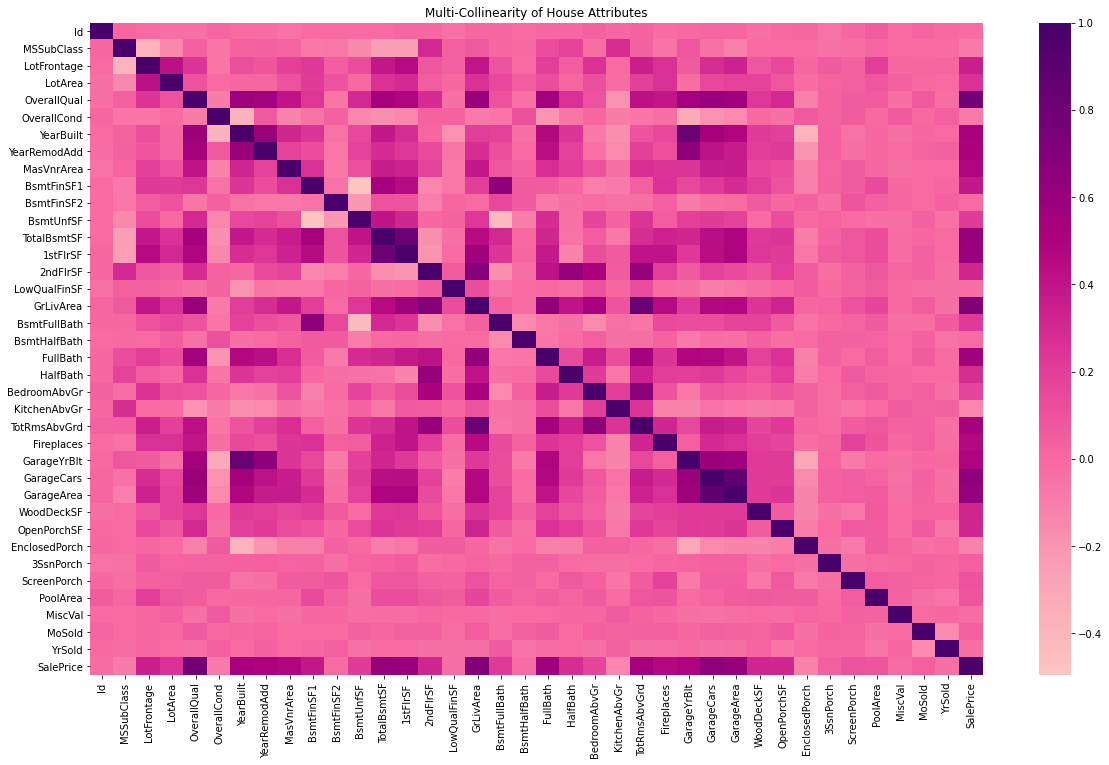

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(), center=0, cmap='RdPu')
ax.set_title('Multi-Collinearity of House Attributes')

#### Choosing Attributes
We chose following attributes because they are more correlated to SalePrice and can help us to design a more efficient model for the problem.
<ol>
    <li>
<b>OverallQual:</b> This attribute rates the overall material and finish of the house.
    </li>
    <li>
<b>GrLivArea:</b> This attribute shows above grade (ground) living area square feet that is the total of the upper square feet plus the main floor square feet.
    </li>
    <li>
<b>GarageCars:</b> This attribute shows the size of garage in car capacity.
    </li>
    <li>
<b>TotalBsmtSF:</b> This attribute shows the total square feet of basement area.
    </li>
</ol>

### Question 4

#### Applying Logarithmic Transformation
Logarithmically transforming variables in a regression model is a very common way to handle situations where a non-linear relationship exists between the independent and dependent variables.
Using the logarithm of one or more variables instead of the un-logged form makes the effective
relationship non-linear, while still preserving the linear model.

Logarithmic transformations are also a convenient means of transforming a highly skewed variable
into one that is more approximately normal.

In [11]:
data['SalePriceLogarithm'] = np.log(data['SalePrice']) 

In [12]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePriceLogarithm
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.355878
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.372023


Text(0.5, 1.0, 'Multi-Collinearity of House Attributes')

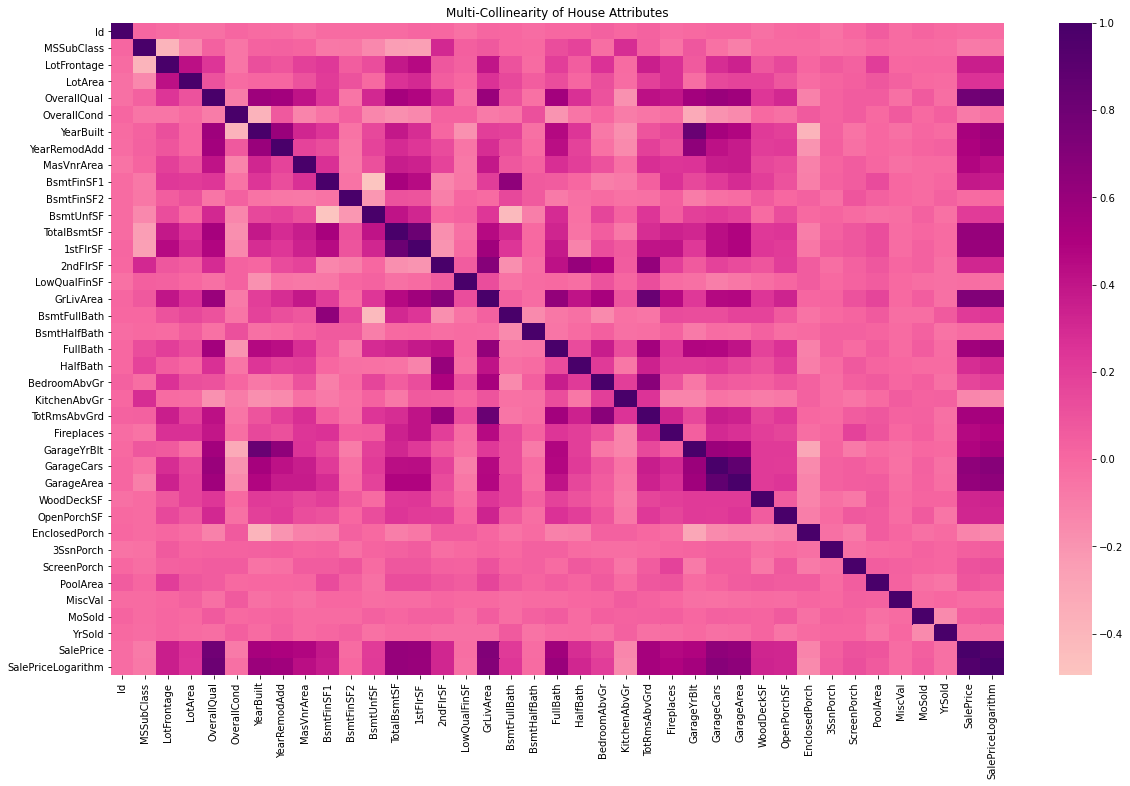

In [13]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(), center=0, cmap='RdPu')
ax.set_title('Multi-Collinearity of House Attributes')

When we applied this method for SalePrice column, some correlations changed an it can be a sign of non-linear relation between those attributes and house price. Moreover, we know that house price is a highly skewed variable.

In [14]:
target = 'SalePriceLogarithm'

### Question 5

#### Explaining the Problem with Corr
No, it is not enough because it does not consider categorical attributes in our dataset. 

Pearson's correlation is the default correlation used with Pandas corr method. Categorical features (not numerical) are ignored during this process due to their nature of not being continuous. It makes no sense to say if categorical_var1 is increased by one, categorical_var2 also increases by X (X's value depends on the correlation between the 2 variables). That is why we only see numerical variables.

### Question 6

Matplotlib <b>scatter</b> method is used to show the relationship between two variables as dots in two dimensions, one axis for each attribute. 

But there is a problem with this method, that it does not show the density of points.

In [15]:
def draw_scatter_plot(attribute, target, color):
    fig = plt.figure()
    plt.scatter(data[attribute], data[target], c = color)
    fig.suptitle('Correlation between ' + target + ' & ' + attribute , fontsize = 15)
    plt.xlabel(attribute, fontsize = 12)
    plt.ylabel(target, fontsize = 12)
    plt.show()

Seaborn <b>jointplot</b> method is used to display a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. 

Moreover, it is a density plot and based on that, it has solved the problem with scatter.

In [16]:
def draw_joint_plot(attribute, target, color):
    p = sns.jointplot(data=data, x=attribute, y=target, kind="hex", color=color)
    p.fig.subplots_adjust(top=0.95)
    p.fig.suptitle('Correlation between ' + target + ' & ' + attribute , fontsize = 15)

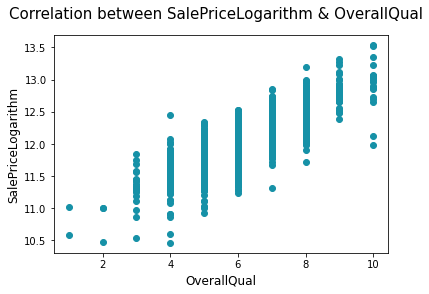

In [17]:
draw_scatter_plot('OverallQual', target, '#1691a7')

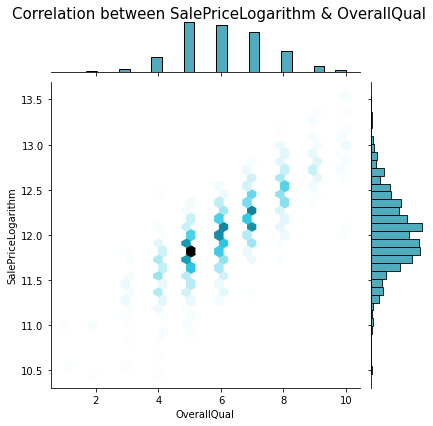

In [18]:
draw_joint_plot('OverallQual', target, '#1691a7')

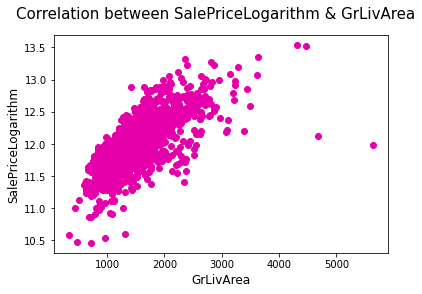

In [19]:
draw_scatter_plot('GrLivArea', target, '#e500a9')

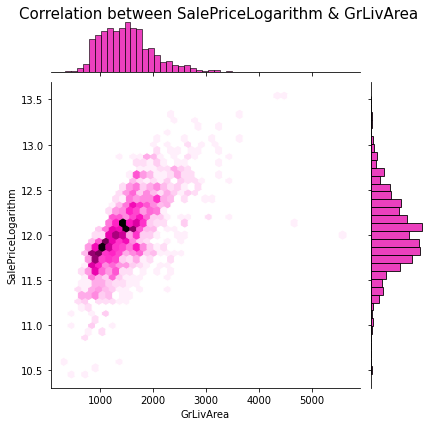

In [20]:
draw_joint_plot('GrLivArea', target, '#e500a9')

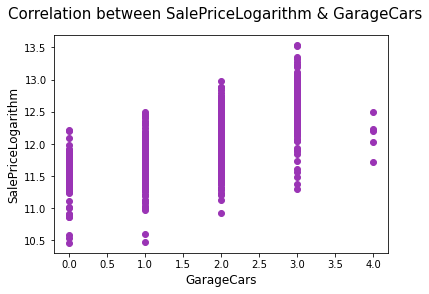

In [21]:
draw_scatter_plot('GarageCars', target, '#9a34b5')

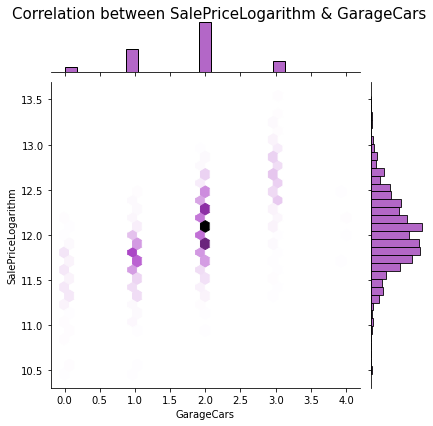

In [22]:
draw_joint_plot('GarageCars', target, '#9a34b5')

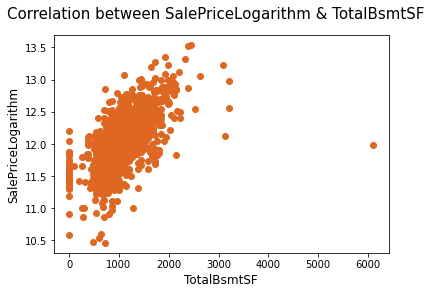

In [23]:
draw_scatter_plot('TotalBsmtSF', target, '#de6722')

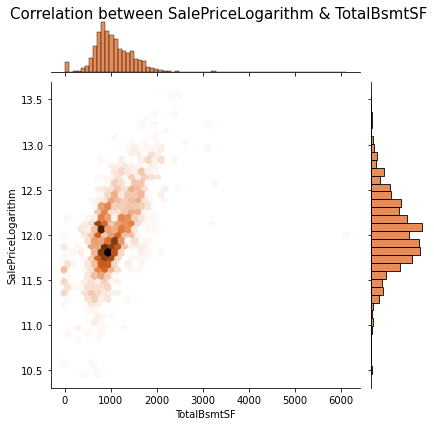

In [24]:
draw_joint_plot('TotalBsmtSF', target, '#de6722')

### Question 7

#### Choosing Categorical Attributes
We chose following categorical attributes because they are more correlated to SalePrice and can help us to design a more efficient model for the problem.
<ol>
    <li>
<b>HeatingQC:</b> This attribute shows Heating quality and condition
    </li>
    <li>
<b>GarageQual:</b> This attribute shows Garage quality
    </li>
    <li>
<b>BsmtCond:</b> This attribute Evaluates the general condition of the basement
    </li>
</ol>

#### Plotting Categorical Attributes
Seaborn <b>barplot</b> method is basically used to aggregate the categorical data according to some methods and by default it's the mean. It can also be understood as a visualization of the group by action. 

In [25]:
def draw_cat_plot(attribute, target):
    plot_order = data.groupby(attribute)[target].mean().sort_values(ascending=False).index.values
    sns.catplot(data=data, x=attribute, y=target, kind='bar', order=plot_order, ci=None)

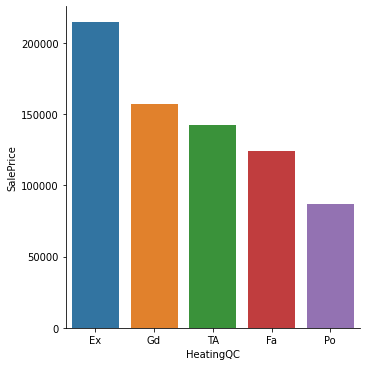

In [26]:
draw_cat_plot('HeatingQC', 'SalePrice')

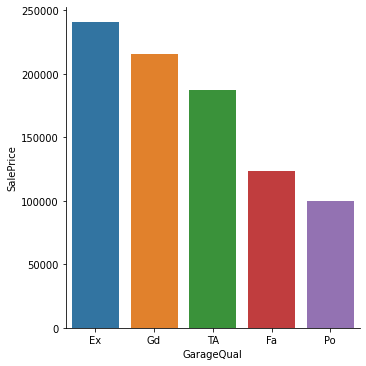

In [27]:
draw_cat_plot('GarageQual', 'SalePrice')

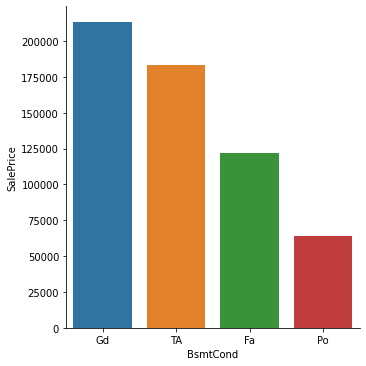

In [28]:
draw_cat_plot('BsmtCond', 'SalePrice')

### Question 8

In [29]:
def printEqualityPercent(attr1, attr2):
    diff = data[attr1].eq(data[attr2].values).mean()
    diff_percent = diff * 100
    print('Percentage of Equality:', str(diff_percent))

In this part we find some data that have NA values but it does not mean missing value. So, we will change these values.

In [30]:
def replaceMissleadingNA():
    columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',\
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PoolQC',\
               'Fence', 'MiscFeature']
    for column in columns:
        data[column] = data[column].fillna('No')
    
    data['BsmtExposure'] = data['BsmtExposure'].fillna('No2')

In [31]:
replaceMissleadingNA()

In [32]:
printMissingPercentage(data)

              Property  MissingValuesPercentage
0          LotFrontage                17.739726
1          GarageYrBlt                 5.547945
2           GarageCond                 5.547945
3           MasVnrArea                 0.547945
4           MasVnrType                 0.547945
..                 ...                      ...
77           ExterCond                 0.000000
78           ExterQual                 0.000000
79         Exterior2nd                 0.000000
80         Exterior1st                 0.000000
81  SalePriceLogarithm                 0.000000

[82 rows x 2 columns]


In [33]:
data[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


In this part we can see that these three attributes are highly correlated. We will use this fact in handling NA values.

In [34]:
printEqualityPercent('GarageYrBlt', 'YearBuilt')

Percentage of Equality: 74.58904109589041


In [35]:
data[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd
GarageYrBlt,1.000000,0.825667,0.642277
YearBuilt,0.825667,1.000000,0.592855
YearRemodAdd,0.642277,0.592855,1.000000


In this part, we will remove columns that do not have any information gain.

In [36]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

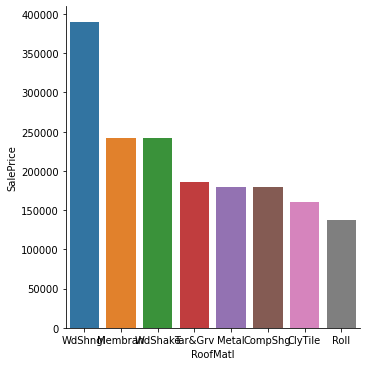

In [37]:
draw_cat_plot('RoofMatl', 'SalePrice')

In [38]:
data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64

In [39]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

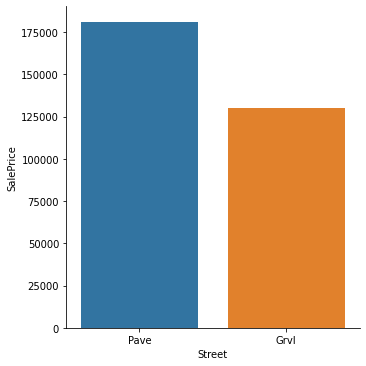

In [40]:
draw_cat_plot('Street', 'SalePrice')

In [41]:
data.drop(['Utilities'], axis=1, inplace=True)
data.drop(['Street'], axis=1, inplace=True)

We do not need these two columns in our prediction.

In [42]:
data.drop(['SalePrice'], axis=1, inplace=True)

In [43]:
data.drop(['Id'], axis=1, inplace=True)

### Phase 1: Preprocessing

### Question 1

#### Techniques for Handling Missing Values
<br/>
<div style="text-align: justify;">
<ul>
    <li>
<span style="color: #e500a9;"><b>Deleting Rows or Columns:</b></span>
This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.
    </li>
    <li>
<span style="color: #e500a9;"><b>Replacing with Mean or Median or Mode:</b></span>       
This strategy can be applied on an attribute which has numeric data. We can calculate the mean, median or mode of the attribute and replace it with the missing values. This is an approximation which can add variance to the dataset. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.   
    </li>
    <li>
<span style="color: #e500a9;"><b>Assigning a Unique Category:</b></span> 
A categorical attribute will have a definite number of possibilities (classses). Therefore, we can assign another class for the missing values. Here, the features Cabin and Embarked have missing values which can be replaced with a new category, say, U for ‘unknown’. This strategy will add more information into the dataset which will result in the change of variance.
    </li>
    <li>
<span style="color: #e500a9;"><b>Predicting The Missing Values:</b></span> 
we can predict the nulls with the help of a machine learning algorithm; this can be done by using the attributes which do not have missing values. This method may result in better accuracy, unless a missing value is expected to have a very high variance.
    </li>
    <li>
<span style="color: #e500a9;"><b>Using Algorithms which Support Missing Values:</b></span> 
KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. Another algorithm which can be used here is RandomForest. This model produces a robust result because it works well on non-linear and the categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.
    </li>
</ul>
</div>

#### Comparing Techniques
<br/>
<div style="text-align: justify;">
<ul>
    <li>
Complete removal of data with missing values results in robust and highly accurate model and deleting a particular row or a column with no specific information is better, since it does not have a high weightage.But sometimes it may result in loss of information and data and works poorly if the percentage of missing values is high, compared to the whole dataset.
    </li>
    <li>
Statistical approach is a better approach when the data size is small. It can prevent data loss which results in removal of the rows and columns. But, imputing the approximations add variance and bias and it works poorly compared to other multiple-imputations method.
    </li>
    <li>
Assigning a unique category negates the loss of data. But, it adds less variance and also adds another attribute to the model while encoding, which may result in poor performance.
    </li>
    <li>
Imputing the missing variable is an improvement as long as the bias from the same is smaller than the omitted variable bias. Moreover, this approach yields unbiased estimates of the model parameters. But, bias also arises when an incomplete conditioning set is used for a categorical variable and considered only as a proxy for the true values.
    </li>
    <li>
Using algorithms which Support missing values does not require creation of a predictive model for each attribute with missing data in the dataset. Moreover, correlation of the data is neglected. But, it is a very time consuming process and it can be critical in data mining where large databases are being extracted.
    </li>
</ul>
</div>

### Question 2

In previous phase we saw that some of the NA values were not missing values. So, we changed their value to avoid missleading. 
#### LotFrontage
After this modification, "LotFrontage" has the most number of missing values. But is is an important feature in our data and the "SalePrice" is correlatefd to it. So, we decided to fill its NA values with median of that column. We used the same technique for <b>"MasVnrArea"</b>.
#### GarageYrBlt
The next feature is "GarageYrBlt". It is highly correlated with "YearBuilt". So, we decided to use imputation to fill its NA values.
#### MasVnrType & Electrical
For these two categorical column, we decided to fill their missing values with a new unique category.

To sum up, dropping column that has missing value is not the best way and can cause information loss and its better to try anther altervnatives.

In [44]:
def replaceNAbyImputer(self):
    df = self.data[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

    imputer = KNNImputer(n_neighbors=5)
    df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

    self.data['GarageYrBlt'] = df['GarageYrBlt']

In [45]:
def replaceNAbyMedian(self):
    self.data['LotFrontage'] = self.data['LotFrontage'].fillna(self.data['LotFrontage'].median())
    self.data['MasVnrArea'] = self.data['MasVnrArea'].fillna(self.data['MasVnrArea'].median())

In [46]:
def replaceNAbyUniqueCat(self):
    self.data['MasVnrType'] = self.data['MasVnrType'].fillna('Unknown')
    self.data['Electrical'] = self.data['Electrical'].fillna('Unknown')

In [47]:
def handleMissingValues(self):
    self.replaceNAbyImputer()
    self.replaceNAbyMedian()
    self.replaceNAbyUniqueCat()

### Question 3

#### Normalizing Data
<br/>
<div style="text-align: justify;"> 
Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.

It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.
</div>

#### Standardizing Data
<br/>
<div style="text-align: justify;"> 
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.
</div>

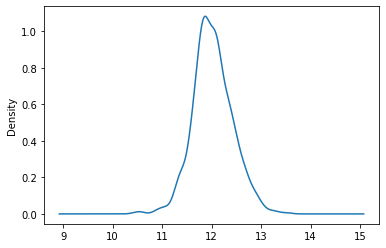

In [48]:
ax = data[target].plot.kde()

Here we plot the probability density function for target; this is done by using kde method. It is simillar to bell. Therefore, it has a normal distribution and we do not need to normalize it.

### Question 4


#### Techniques for Encoding Categorical Attributes
<br/>
<div style="text-align: justify;">
<ul>
    <li>
<span style="color: #e500a9;"><b>Ordinal Encoding:</b></span>
We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.
    </li>
    <li>
<span style="color: #e500a9;"><b>One Hot Encoding:</b></span>       
We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.
These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable. 
    </li>
    <li>
<span style="color: #e500a9;"><b>Dummy Encoding:</b></span> 
Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.
    </li>
    <li>
<span style="color: #e500a9;"><b>Effect Encoding:</b></span> 
This encoding technique is also known as Deviation Encoding or Sum Encoding. Effect encoding is almost similar to dummy encoding, with a little difference. In dummy coding, we use 0 and 1 to represent the data but in effect encoding, we use three values i.e. 1,0, and -1.
    </li>
    <li>
<span style="color: #e500a9;"><b>Binary Encoding:</b></span> 
In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.
Binary encoding works really well when there are a high number of categories. 
    </li>
    <li>
<span style="color: #e500a9;"><b>Target Encoding:</b></span> 
Target encoding is a Baysian encoding technique. In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category.
    </li>
</ul>
</div>

### Using Same technique To handle Categorical Data?
No, it is not a good way. The best way is to learn more about these attributes and find the meaning of different values that they can get. For example, PoolQC is a categorical data that its values show different levels. In this case, Ordinal Encoding is the best way to handle this attribute.

In [49]:
def applyBooleanEncoder(self):
    self.data['CentralAir'] = self.data['CentralAir'].apply(lambda x: 0 if x.strip()=='N' else 1)

In [50]:
ordinal_cols_mapping = [{
    "col":"ExterQual",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1
    }}, {
    "col":"FireplaceQu",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1,
        'No':0
    }}, {
    "col":"KitchenQual",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1
    }}, {
    "col":"HeatingQC",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1
    }}, {
    "col":"BsmtQual",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1,
        'No':0
    }}, {
    "col":"BsmtCond",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1,
        'No':0
    }}, {
    "col":"ExterCond",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1
    }}, {
    "col":"LotShape",    
    "mapping": {
        'Reg':1, 
        'IR1':2, 
        'IR2':3, 
        'IR3':4
    }}, {
    "col":"GarageFinish",    
    "mapping": {
        'Fin':3, 
        'RFn':2, 
        'Unf':1, 
        'No':0
    }}, {
    "col":"PavedDrive",    
    "mapping": {
        'Y':3, 
        'P':2, 
        'N':1
    }}, {
    "col":"BsmtExposure",    
    "mapping": {
        'Gd':4, 
        'Av':3, 
        'Mn':2,
        'No':1,
        'No2':0
    }}, {
    "col":"BsmtFinType1",    
    "mapping": {
        'GLQ':6, 
        'ALQ':5, 
        'BLQ':4,
        'Rec':3,
        'LwQ':2,
        'Unf':1,
        'No':0 
    }}, {
    "col":"BsmtFinType2",    
    "mapping": {
        'GLQ':6, 
        'ALQ':5, 
        'BLQ':4,
        'Rec':3,
        'LwQ':2,
        'Unf':1,
        'No':0 
    }},
]

In [51]:
poolQcMapping = [{
   "col":"PoolQC",    
    "mapping": {
        'Ex':4, 
        'Gd':3, 
        'TA':2, 
        'Fa':1, 
        'No':0
    }}]

In [52]:
garageQualMapping = [{
   "col":"GarageQual",    
    "mapping": {
        'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1,
        'No':0
    }}]

In [53]:
def applyOrdinalEncoder(self):
    if "PoolQC" in self.data:
        encoder = ce.OrdinalEncoder(mapping = poolQcMapping, return_df = True)  
        self.data = encoder.fit_transform(self.data)
        
    if "GarageQual" in self.data:
        encoder = ce.OrdinalEncoder(mapping = garageQualMapping, return_df = True)  
        self.data = encoder.fit_transform(self.data)
        
    encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, return_df = True)  
    self.data = encoder.fit_transform(self.data)

In [54]:
def applyOneHotEncoder(self):   
    for column in self.data:
        if (is_numeric_dtype(self.data[column]) == False):
            encoder = ce.OneHotEncoder()  
            encoded = encoder.fit_transform(self.data[column])
            self.data.drop([column], axis=1, inplace=True)
            self.data = self.data.join(encoded)

In [55]:
def handleCategoricalData(self):
    self.applyBooleanEncoder()
    self.applyOrdinalEncoder()
    self.applyOneHotEncoder()

### Question 5

An alternative approach could be to remove categorical variables from the dataset. While removing features is always an option, it may not be the best way to deal with categorical variables as we will lose potentially important information.

### Question 6

#### Techniques for Cross-Validation
<ol>
    <li>
Leave p out cross-validation
    </li>
    <li>
Leave one out cross-validation
    </li>
    <li>
Holdout cross-validation
    </li>
    <li>
Repeated random subsampling validation
    </li>
    <li>
k-fold cross-validation
    </li>
    <li>
Stratified k-fold cross-validation
    </li>
    <li>
Time Series cross-validation
    </li>
    <li>
Nested cross-validation
    </li>
</ol>

#### Why should we use randomness in train-test split?
It may depend on where the data came from and how it was exported. It's not uncommon that real world data is sorted in some manner. In general, splits are random, which is equivalent to shuffling and selecting the first X % of the data. When the splitting is random, we do not have to shuffle it beforehand. If we do not split randomly, our train and test splits might end up being biased and we may have a different data distribution in iur splits. 

In [56]:
def splitTestTrain(self):
    X = self.data.drop(columns=[self.target])
    y = self.data[self.target]
    self.X_train, self.X_test, self.y_train, self.y_test = \
        train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)  

### Question 1

#### K Nearest Neighbors

In [57]:
def tunekNeighborsParams(self):   
    gridParams = {'n_neighbors': list(range(1, MAX_NEIGHBOURS+1, 2))}

    gs = GridSearchCV(
        KNeighborsRegressor(),
        gridParams,
        scoring = self.scoring,
        refit = 'RMSE',
        return_train_score=True
    )

    gsResult = gs.fit(self.X_train, self.y_train)
    self.kNeighbors = gsResult.best_estimator_ 
    print(gsResult.best_params_)
    results = gs.cv_results_
    self.draw_parameter_tuning_plot(results, 'n_neighbors')

In [58]:
def runkNeighborsModel(self):
    self.tunekNeighborsParams()
    self.kNeighbors = self.kNeighbors.fit(self.X_train, self.y_train)
    trainPred = self.kNeighbors.predict(self.X_train)
    testPred = self.kNeighbors.predict(self.X_test)
    
    trainPred, testPred = self.undo_logarithm_effect(trainPred, testPred)
        
    self.printPredictionResults(trainPred, testPred, K_NEIGHBOURS_TITLE)

#### Decision Tree

In [59]:
def tuneDesicionTreeParams(self):    
    gridParams = {'max_depth': list(range(1, MAX_DEPTH+1, 2))}

    gs = GridSearchCV(
        DecisionTreeRegressor(),
        gridParams,
        scoring = self.scoring,
        refit = 'RMSE',
        return_train_score=True
    )

    gsResult = gs.fit(self.X_train, self.y_train)
    self.decisionTree = gsResult.best_estimator_ 
    print(gsResult.best_params_)
    results = gs.cv_results_
    self.draw_parameter_tuning_plot(results, 'max_depth')

In [60]:
def runDesicionTreeModel(self):
    self.tuneDesicionTreeParams()
    self.decisionTree = self.decisionTree.fit(self.X_train, self.y_train)
    trainPred = self.decisionTree.predict(self.X_train)
    testPred = self.decisionTree.predict(self.X_test)
    
    trainPred, testPred = self.undo_logarithm_effect(trainPred, testPred)
    
    self.printPredictionResults(trainPred, testPred, DECISION_TREE_TITLE)

#### Linear Regression

In [61]:
def runLinearRegressionModel(self):
    self.linearRegression = self.linearRegression.fit(self.X_train, self.y_train)
    trainPred = self.linearRegression.predict(self.X_train)
    testPred = self.linearRegression.predict(self.X_test)
    
    trainPred, testPred = self.undo_logarithm_effect(trainPred, testPred)
    
    self.printPredictionResults(trainPred, testPred, LINEAR_TITLE)

### Question 2

In [62]:
def draw_parameter_tuning_plot(self, results, parameter):
    plt.figure(figsize=(20, 12))
    plt.title("GridSearchCV evaluating using multiple errors simultaneously",
              fontsize=16)

    plt.xlabel("min_samples_split", fontsize=12)
    plt.ylabel("Error", fontsize=12)

    ax = plt.gca()
    X_axis = np.array(results['param_%s' % parameter].data, dtype=float)

    for scorer, color in zip(sorted(self.scoring), ['g', '#e500a9']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                            sample_score_mean + sample_score_std,
                            alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                    alpha=1 if sample == 'test' else 0.7,
                    label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
                linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    
        ax.annotate("%0.1f" % best_score,
                    (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()

### Question 3

Underfitting:
A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough. It usually happens when we have less data to build an accurate model and also when we try to build a linear model with a non-linear data. In such cases the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection.

Overfitting:
A statistical model is said to be overfitted, when we train it with a lot of data. When a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees.

### Question 4

### Phase 3: ‫‪Ensemble‬‬ ‫‪Methods‬‬

### Question 1

In [63]:
def tuneRandomForestParams(self):
    gridParams = {'n_estimators': list(range(1, MAX_ESTIMATORS+1, 2)),
                  'max_depth': list(range(1, MAX_DEPTH+1, 2))}

    gs = GridSearchCV(
        RandomForestRegressor(),
        gridParams,
        scoring = self.scoring,
        refit = 'RMSE',
        return_train_score=True
    )

    gsResult = gs.fit(self.X_train, self.y_train)
    self.randomForest = gsResult.best_estimator_ 
    print(gsResult.best_params_)
    results = gs.cv_results_
    self.draw_parameter_tuning_plot(results, 'n_estimators')
    self.draw_parameter_tuning_plot(results, 'max_depth')

In [64]:
def runRandomForestModel(self):
    self.tuneRandomForestParams()
    self.randomForest = self.randomForest.fit(self.X_train, self.y_train)
    trainPred = self.randomForest.predict(self.X_train)
    testPred = self.randomForest.predict(self.X_test)
    
    trainPred, testPred = self.undo_logarithm_effect(trainPred, testPred)
    
    self.printPredictionResults(trainPred, testPred, RANDOM_FOREST_TITLE)

### Question 2

In [65]:
def runVotingRegressionModel(self):
    self.votingRegression = VotingRegressor([('knn', self.kNeighbors), \
                                   ('dt', self.decisionTree), ('lr', self.linearRegression)])    
    self.votingRegression = self.votingRegression.fit(self.X_train, self.y_train)
    trainPred = self.votingRegression.predict(self.X_train)
    testPred = self.votingRegression.predict(self.X_test)
    
    trainPred, testPred = self.undo_logarithm_effect(trainPred, testPred)
    
    self.printPredictionResults(trainPred, testPred, VOTING_TITLE)

### Question 3

In [66]:
def printPredictionResults(self, trainPred, testPred, regressorName):
    print(STARS, regressorName, STARS)
    print("Train MAE:", mean_absolute_error(self.y_train, trainPred))
    print("Train RMSE:", mean_squared_error(self.y_train, trainPred, squared=False))   
    print("Test MAE:", mean_absolute_error(self.y_test, testPred))
    print("Test RMSE:", mean_squared_error(self.y_test, testPred, squared=False))
    self.indo_logarithm_effect()

In [67]:
def undo_logarithm_effect(self, trainPred, testPred):
    self.y_train = np.exp(self.y_train)
    self.y_test = np.exp(self.y_test)
    return np.exp(trainPred), np.exp(testPred)

In [68]:
def indo_logarithm_effect(self):
    self.y_train = np.log(self.y_train)
    self.y_test = np.log(self.y_test)

In [69]:
def dropMissingValues(self):
    for column in self.data.columns[self.data.isna().any()].tolist():
        self.data.drop([column], axis=1, inplace=True)

In [70]:
def initialize(self, handleNA, handleCat):
    self.data = restoreData()
    
    if handleNA and handleCat:
        self.handleMissingValues()
        self.handleCategoricalData()
    elif handleNA == False:
        self.dropMissingValues()
        self.applyOneHotEncoder()
    elif handleCat == False:
        self.handleMissingValues()
        self.applyOneHotEncoder()
        
    self.splitTestTrain()

In [71]:
class HousePricePredictor:
    def __init__(self, target, mapping):
        self.mapping = mapping
        self.target = target
        self.targetInfo = {}
        self.kNeighbors = None
        self.decisionTree = None
        self.linearRegression = LinearRegression()
        self.randomForest = None
        self.votingRegression = None    
        self.numOfNeighbors = 1
        self.scoring = {'MAE': make_scorer(mean_absolute_error, greater_is_better=False),\
           'RMSE': make_scorer(mean_squared_error, squared = False, greater_is_better=False)}
        
    initialize = initialize
    
    handleMissingValues = handleMissingValues
    replaceNAbyImputer = replaceNAbyImputer
    replaceNAbyMedian = replaceNAbyMedian
    replaceNAbyUniqueCat = replaceNAbyUniqueCat
    
    handleCategoricalData = handleCategoricalData
    applyBooleanEncoder = applyBooleanEncoder
    applyOrdinalEncoder = applyOrdinalEncoder
    applyOneHotEncoder = applyOneHotEncoder
    
    splitTestTrain = splitTestTrain
    
    runkNeighborsModel = runkNeighborsModel
    runDesicionTreeModel = runDesicionTreeModel
    runLinearRegressionModel = runLinearRegressionModel
    runRandomForestModel = runRandomForestModel 
    runVotingRegressionModel = runVotingRegressionModel
    
    tunekNeighborsParams = tunekNeighborsParams 
    tuneDesicionTreeParams = tuneDesicionTreeParams
    tuneRandomForestParams = tuneRandomForestParams
    
    printPredictionResults = printPredictionResults
    
    undo_logarithm_effect = undo_logarithm_effect
    indo_logarithm_effect = indo_logarithm_effect   
    
    draw_parameter_tuning_plot = draw_parameter_tuning_plot
    
    dropMissingValues = dropMissingValues

In [72]:
Predictor = HousePricePredictor(target, ordinal_cols_mapping)

In [73]:
Predictor.initialize(True, True)

/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categor

{'n_neighbors': 7}


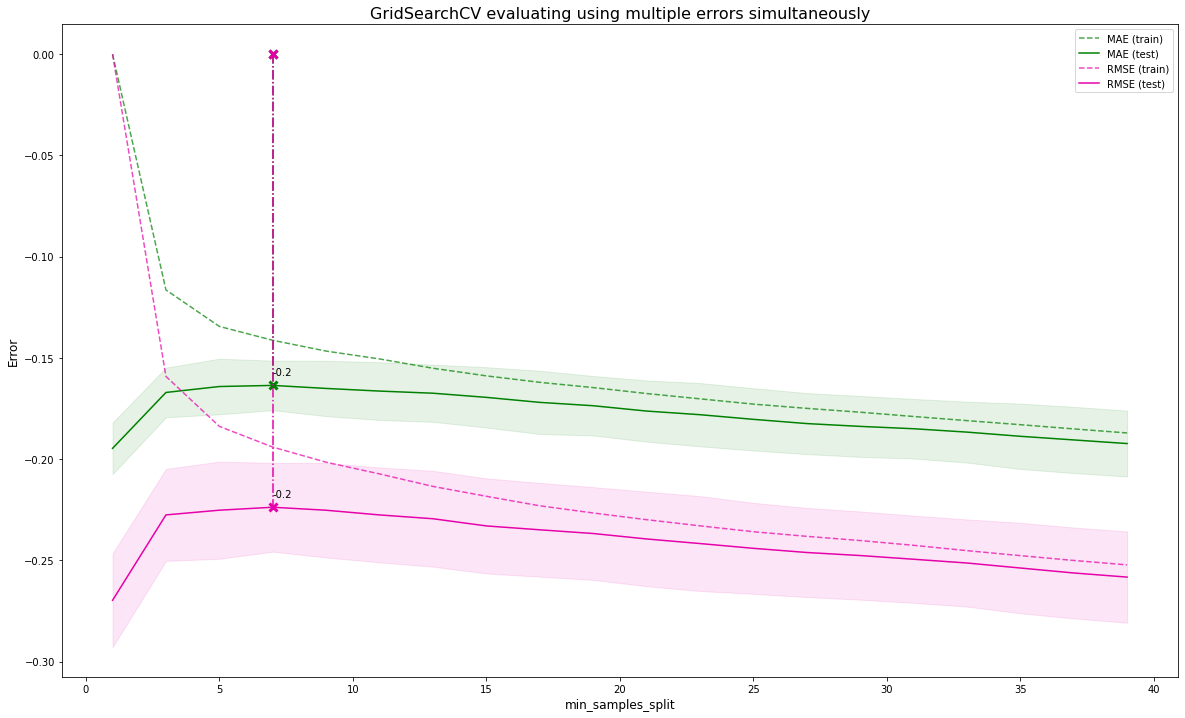

 *****  K Nearest Neighbours  ***** 
Train MAE: 25637.353913672057
Train RMSE: 40413.89956668859
Test MAE: 30623.38085134419
Test RMSE: 52404.05741755188


In [74]:
Predictor.runkNeighborsModel()

{'max_depth': 9}


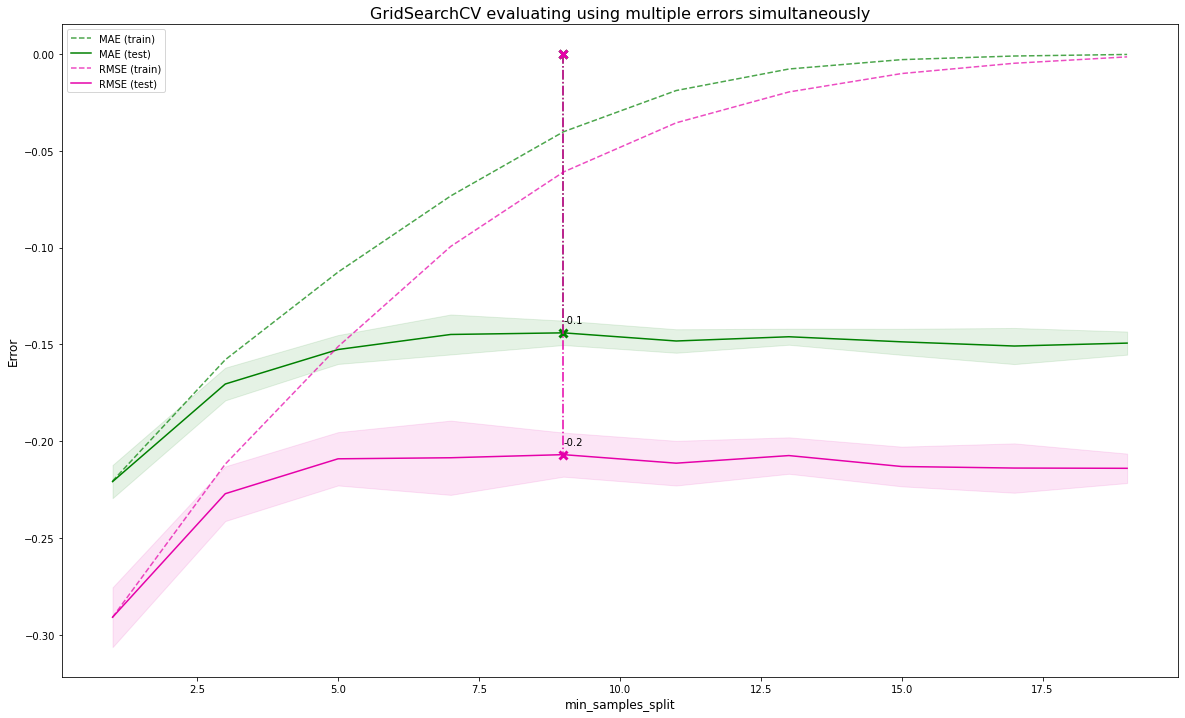

 *****  Decision Tree  ***** 
Train MAE: 7733.649122876538
Train RMSE: 11644.963381761712
Test MAE: 25052.953401897263
Test RMSE: 38952.47037002951


In [75]:
Predictor.runDesicionTreeModel()

In [76]:
Predictor.runLinearRegressionModel()

 *****  Linear Regression  ***** 
Train MAE: 11858.245587264542
Train RMSE: 18428.10239298294
Test MAE: 15066.35364546372
Test RMSE: 22908.851993107914


{'max_depth': 13, 'n_estimators': 19}


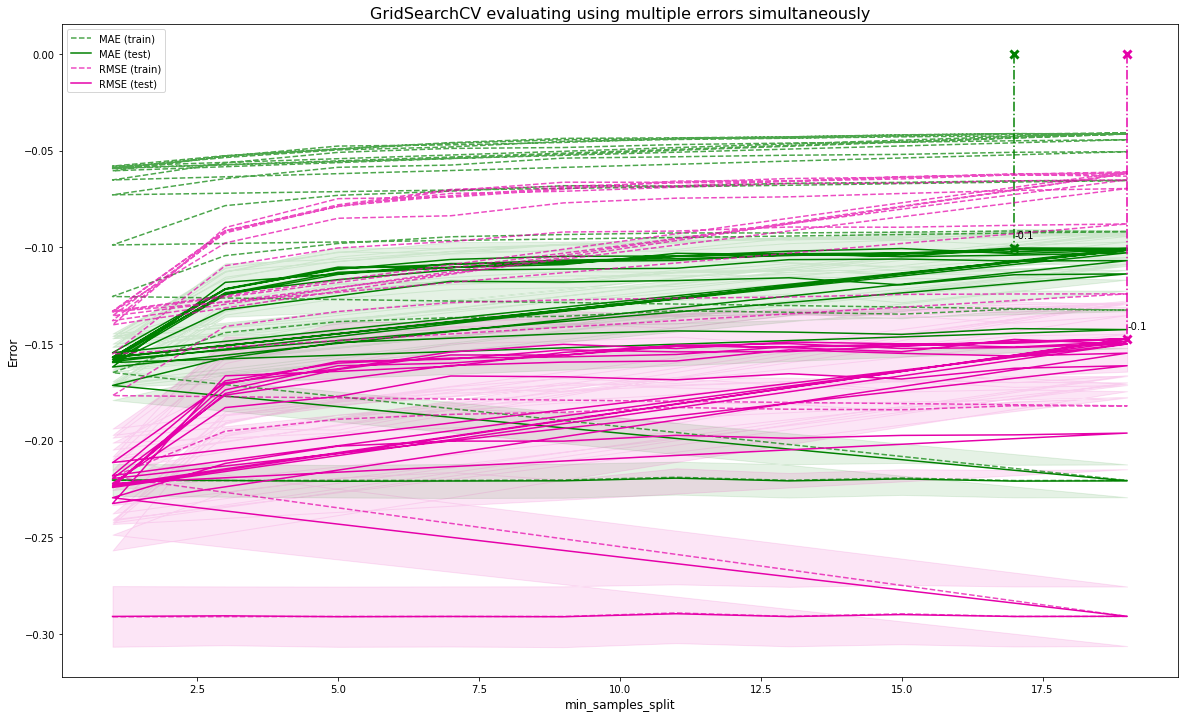

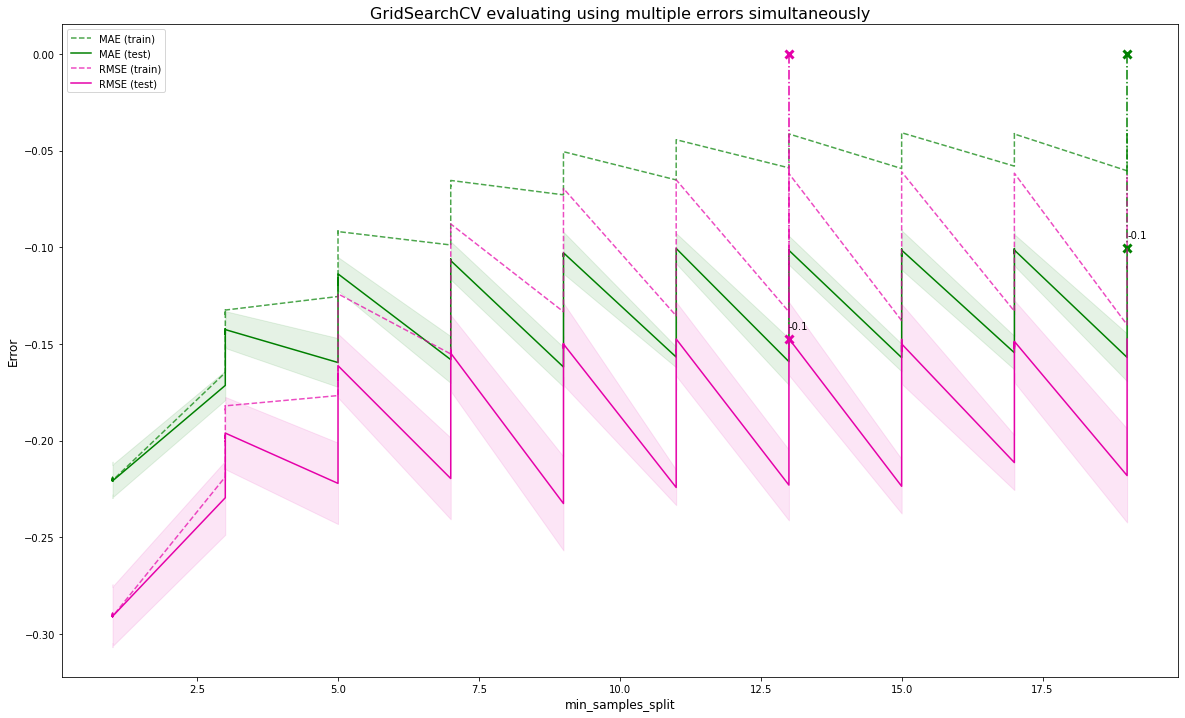

 *****  Random Forest  ***** 
Train MAE: 7538.492560597581
Train RMSE: 13813.598332010715
Test MAE: 17732.457067855095
Test RMSE: 30732.59796967034


In [77]:
Predictor.runRandomForestModel()

In [78]:
Predictor.runVotingRegressionModel()

 *****  Voting Regression  ***** 
Train MAE: 11890.858889051446
Train RMSE: 18879.00056508283
Test MAE: 18485.520591968536
Test RMSE: 36878.615625551334


### Handling NA Data with Dropping

In [79]:
Predictor.initialize(False, True)

/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categor

{'n_neighbors': 5}


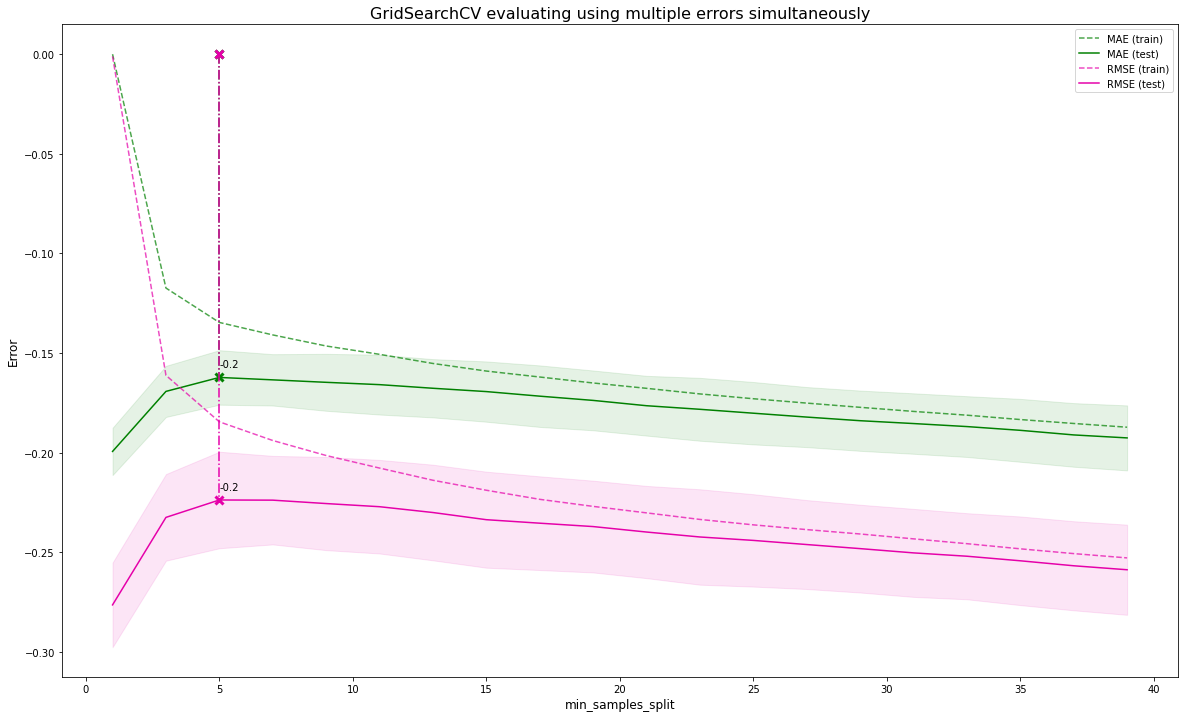

 *****  K Nearest Neighbours  ***** 
Train MAE: 24296.735964324103
Train RMSE: 37709.50777750637
Test MAE: 30756.718281517176
Test RMSE: 53082.853689136624


In [80]:
Predictor.runkNeighborsModel()

{'max_depth': 9}


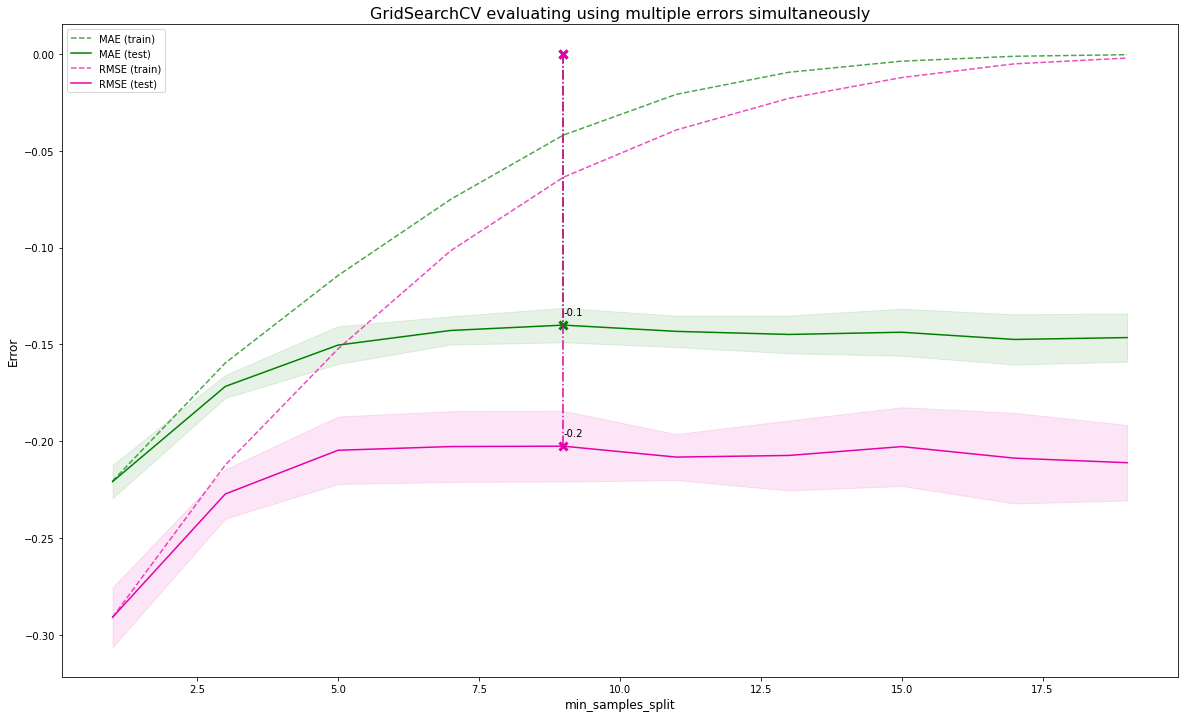

 *****  Decision Tree  ***** 
Train MAE: 7890.2439336402485
Train RMSE: 11976.580633322685
Test MAE: 26114.77166992412
Test RMSE: 50219.82378014713


In [81]:
Predictor.runDesicionTreeModel()

### Handling Categorical Data with Same technique

In [83]:
Predictor.initialize(True, False)

/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categor

/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/ghazal/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categor

{'n_neighbors': 7}


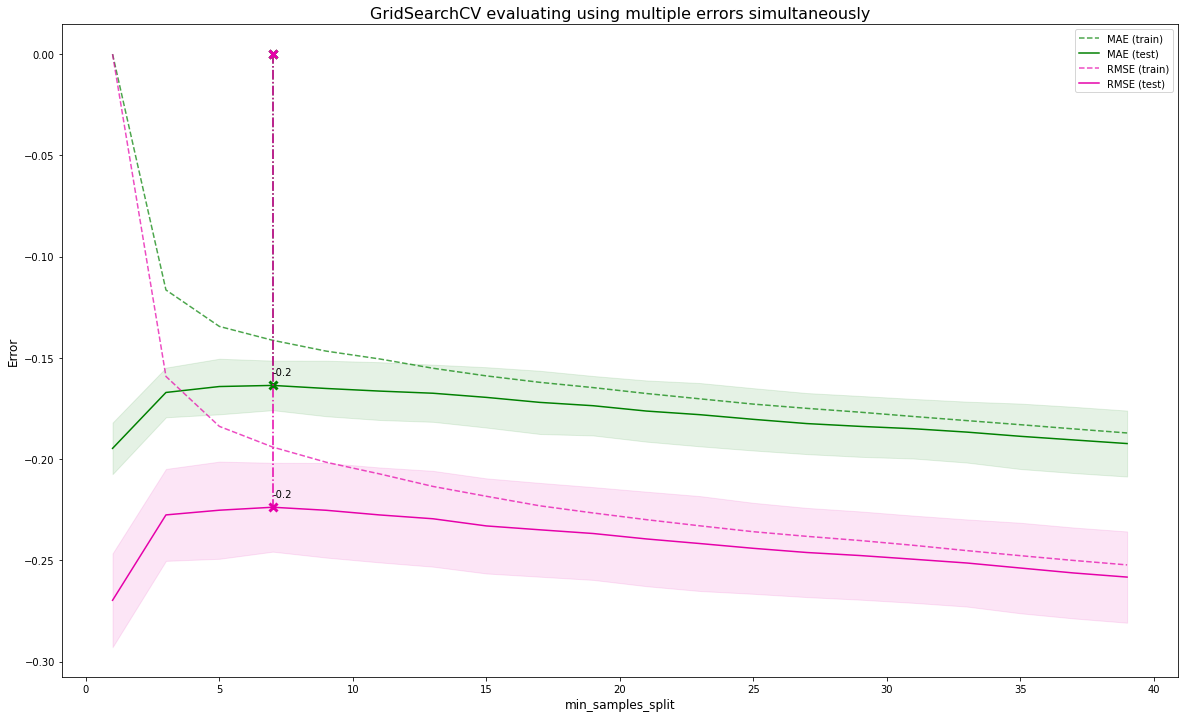

 *****  K Nearest Neighbours  ***** 
Train MAE: 25637.353913672057
Train RMSE: 40413.89956668859
Test MAE: 30623.38085134419
Test RMSE: 52404.05741755188


In [84]:
Predictor.runkNeighborsModel()

{'max_depth': 7}


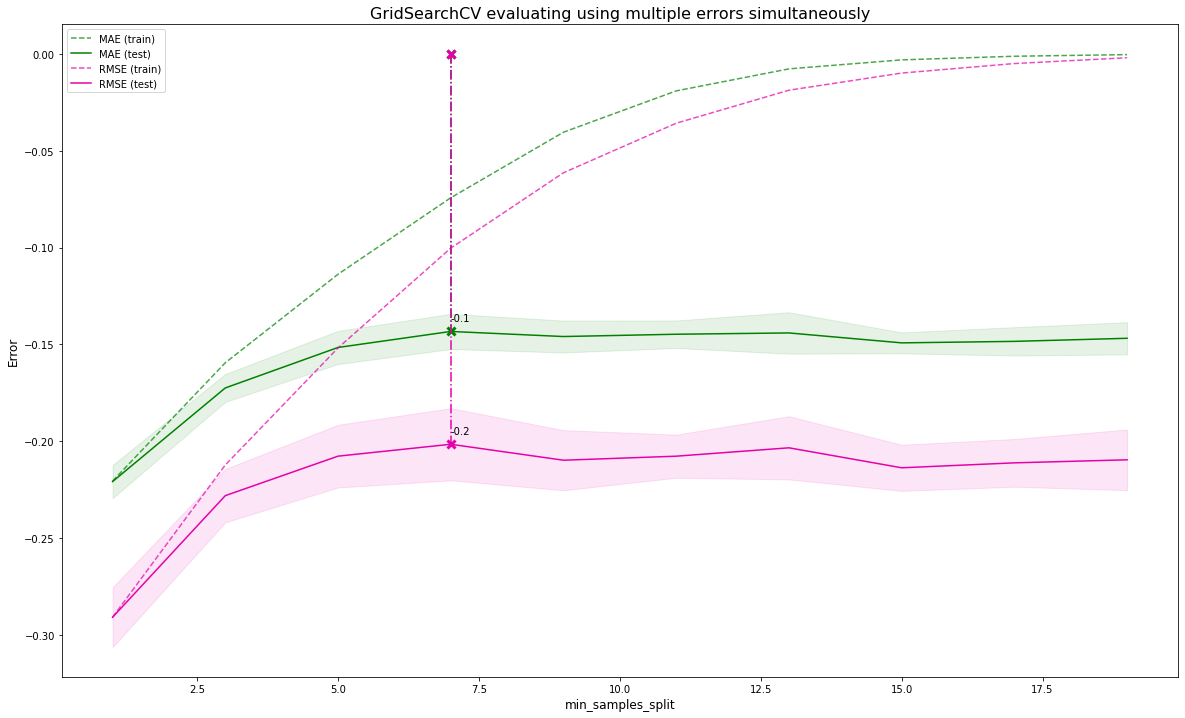

 *****  Decision Tree  ***** 
Train MAE: 13963.858960760166
Train RMSE: 20201.527098567356
Test MAE: 27017.21479223416
Test RMSE: 53640.12551101063


In [85]:
Predictor.runDesicionTreeModel()

In [86]:
Predictor.runLinearRegressionModel()

 *****  Linear Regression  ***** 
Train MAE: 11290.068747954549
Train RMSE: 17785.99537010692
Test MAE: 15149.9295614865
Test RMSE: 22530.841506427474


### Overfitting or Underfitting in Our Models
#### K Nearest Neighbors
Based on the results, we can seed that in comparison to other models, this model has greater errors and it seems that this model has underfitting. But there is no overfitting because the errors are close to each other.
#### Decision Tree
In this model the mor the depth of the tree gets, the more the posibility of overfiting we have. As we defined a range for depth, it is possible for the regressor to choose a very large value for this hyperparameter and then we will get good results on trainig data but it won't work well on test data. There is no underfitting in this model.
#### Linear Regression
We can see that the errors in training and test data in this model are very close to each other. So, there is no overfitting in this model. There is no underfitting in this model.

### The Effects of Preprocessing
#### Handling Missing Values
We can see that without handling these values and by dropping these columns, our models are downgraded. This cis obvious, because we loose important information. Moreover, linear regression can not work with NA values.
#### Handling Categorical Data
There is not much difference between different techniques but without handling them, we will loose important information.

### Voting Regression
This method computes the average of three models. As a result, if a model has underfitting, by this method its underfitting will be reduced. We have the same scenario for overfitting. But we can see that the result of linear regression is better than the results of voting regression. The reason is that linear regression does not have overfitting and underfitting. So, when we combine it with other models, it will be downgraded.

### Conclusion
<br/>
<div style="text-align: justify;"> 
In this computer assignment we learned that naive bayes is a good method to solve regression problems. Also we were introduced to some metrics to merge results of different models to get better results. 
</div>

### References
<br/>
<div style="text-align: justify;"> 
[1] Kang, H., 2013. The prevention and handling of the missing data. Korean journal of anesthesiology, 64(5), p.402.

[2] <i>Towards Data Science, Understanding 8 types of Cross-Validation - URL:</i>  
https://towardsdatascience.com/understanding-8-types-of-cross-validation-80c935a4976d
</div>